Mr Brightside has been in the UK charts for 185 weeks (or nearly 3.5 years) since its release in 2004. 

http://www.officialcharts.com/search/singles/mr-brightside/

** Why? **

To do: Check other songs
       Check other markets
       

In [9]:
%autosave 5
%matplotlib inline

import numpy as np
import pandas as pd
import requests
import bs4 as bs
import selenium.webdriver as webdriver
import re
import matplotlib.pylab as plt
import os
import datetime

Autosaving every 5 seconds


In [10]:
#Use selenium to open officialcharts.com
#To do - Check Chrome version, dl appropriate webdriver

wd = webdriver.Chrome('./chromedriver')
wd.get('http://www.officialcharts.com/search/singles/mr-brightside/')

In [13]:
#Accept threat of cookies, scroll down screen
# wd.find_element_by_class_name('acceptbtn').click()
wd.execute_script("window.scrollTo(0, 400);")

In [14]:
#Execute expanded page (test if successful), scroll down more.
wd.find_element_by_css_selector(".icon-circle-plus").click()
try:
    wd.find_element_by_css_selector('.selected')
except:
    print('Expanding window failed.')

In [15]:
#Pass instance of page source to variable, close connection
source = wd.page_source
# wd.close()

In [17]:
#Use BeautifulSoup to remove necessary data
soup = bs.BeautifulSoup(source)

In [18]:
results = soup.find_all('a', href=re.compile('^/charts/singles-chart/'))

In [19]:
data_dict = {}

for date in results:
    data_dict[date.attrs['data-date']] =  int(date.get_text())

In [20]:
df = pd.DataFrame(data_dict.items(), columns = ['date', 'rank'])
df.head()

,date,rank
0,05.06.2004,10
1,12.06.2004,26
2,19.06.2004,38
3,26.06.2004,60
4,01.01.2005,100


In [21]:
df['date'] = pd.to_datetime(df['date'], format = '%d.%m.%Y')
df.sort_values(by = 'date', inplace = True)
df.head()

,date,rank
0,2004-06-05,10
1,2004-06-12,26
2,2004-06-19,38
3,2004-06-26,60
4,2005-01-01,100


In [22]:
df.set_index('date', drop = True, inplace = True)
df.head()
df.to_csv(os.path.join(os.getcwd(), 'mr_brightside_rank.csv'))

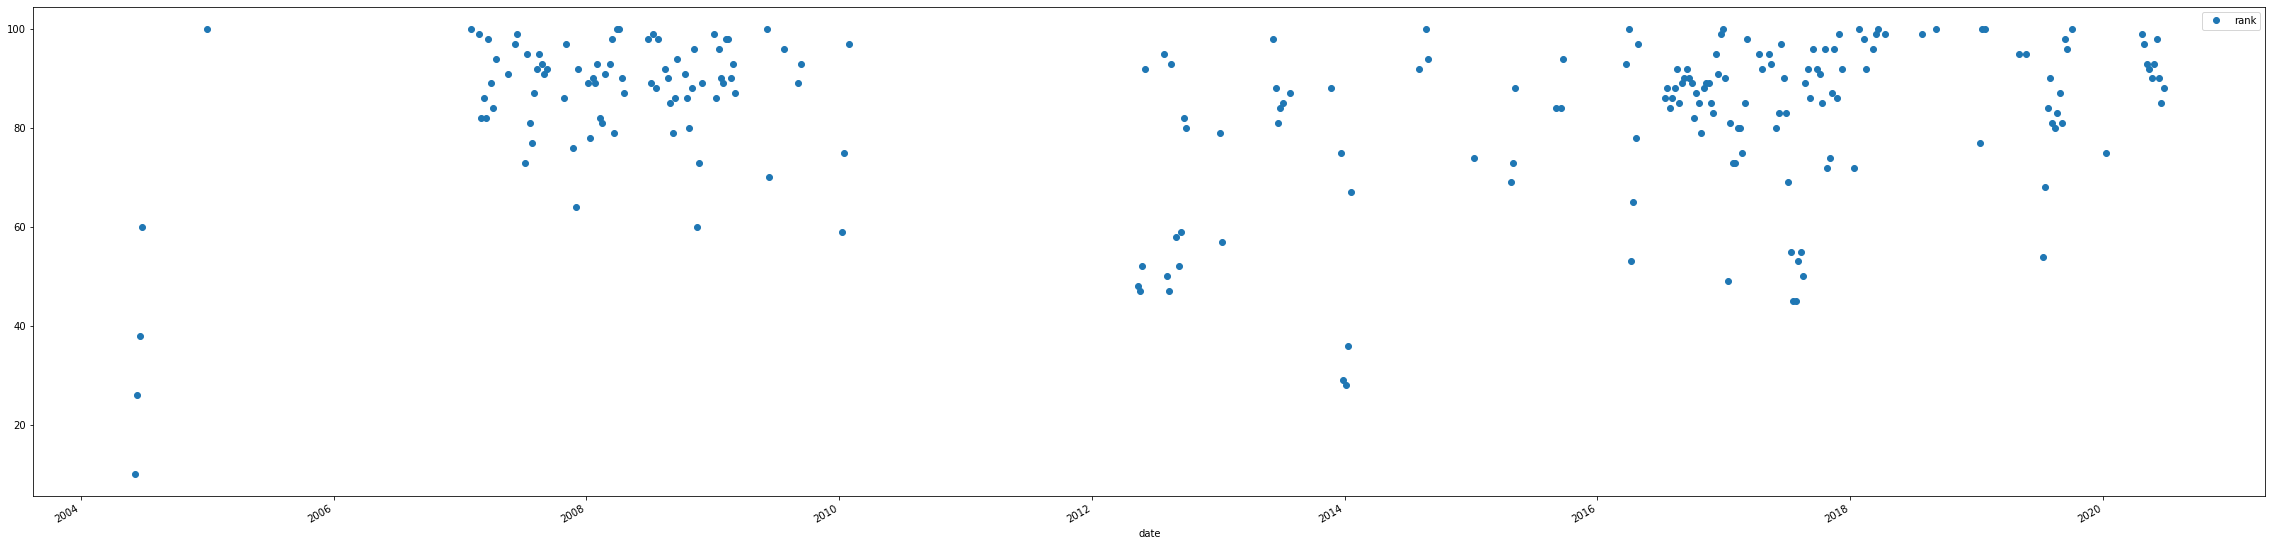

In [23]:
ax = df.plot(figsize=[40,10], style = 'o')

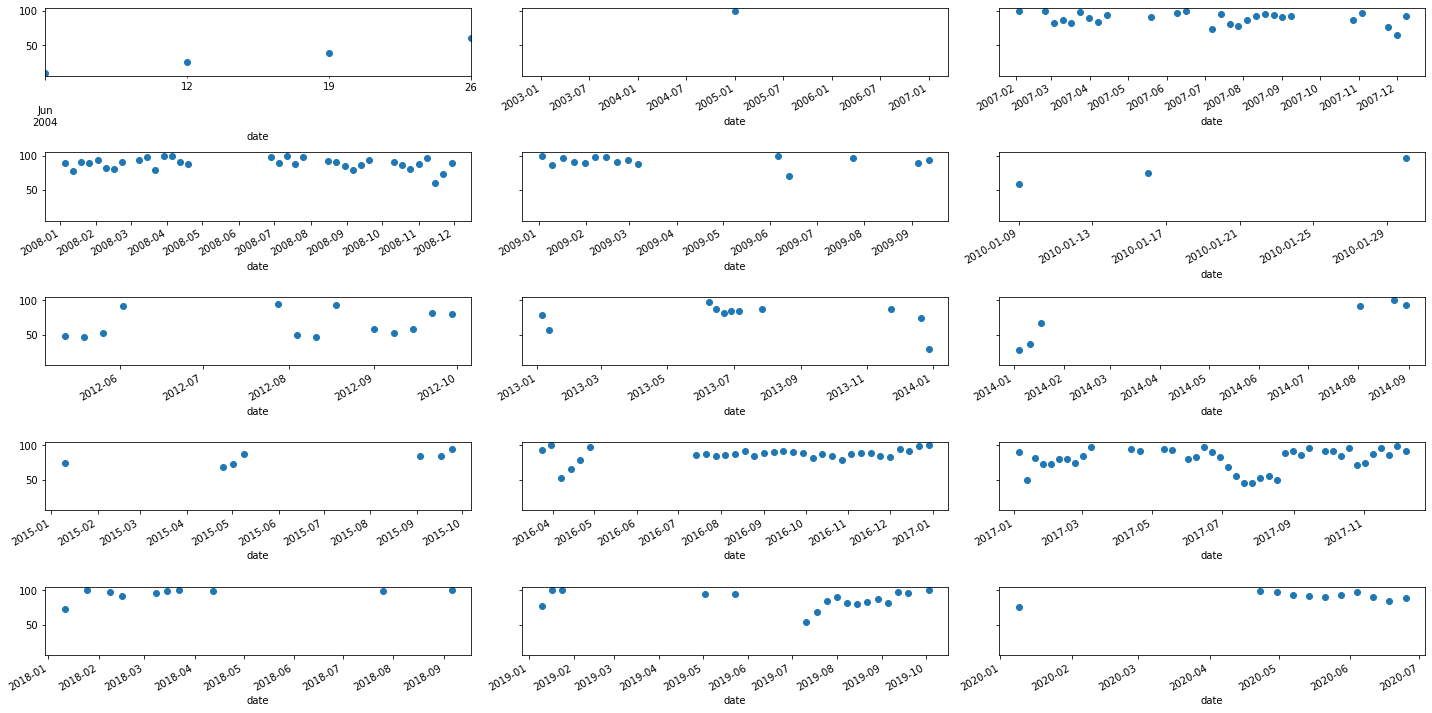

In [33]:
years = df.index.year.unique()
n_plots = int(years.shape[0] / 3)
nyears = len(df.index.year.unique())

fig, ax = plt.subplots(n_plots,3, figsize = [20,10], sharey=True);

for n, year in enumerate(years):
    df[df.index.year == year].plot(style = 'o', ax = fig.axes[n], legend = False)

plt.tight_layout()

1. In the UK charts, Mr. Brightside had moderate success on release (June 2004) with a max chart position of 10, slipping off the top 100 charts in December 2004.

2. From 2005 - late 2006 Mr Brightside remained off the charts.

3. In early 2007, Mr Brightside re-entered the top 100, where it remained until early 2010.

4. From 2010 to 2012 the song was off the charts until a second reimmergence in May 2012. 

5. Since, it has been in and out of the top 100 (a 6 month abscence in 2014 being the longest period above 100).

In [34]:
#Impact of new albums?

page = requests.get('https://en.wikipedia.org/wiki/The_Killers_discography').content
soup = bs.BeautifulSoup(page)

In [56]:
w_tables = soup.find_all('table', attrs = {'class' : 'wikitable plainrowheaders'}) #Get all tables on Killer's wiki
album_table = w_tables[0] #Album table
single_table = w_tables[4] #Singles table

raw_release = album_table.find_all('li', text = re.compile('Released'))
album_release = [name.text.replace('<li>', '').replace('</li>', '').replace('Released:', '') for name in raw_release]

In [48]:
len(w_tables)

10

In [50]:
albums = ["Hot Fuss", "Sam's Town", "Day & Age", "Battle Born", "Wonderful Wonderful"]
album_names = [album_table.find_all('a', text = album)[0].text for album in albums]

album_info = dict(zip(album_names, album_release))

In [52]:
album_df = pd.DataFrame(album_info.items(), columns = ['album', 'date'])
album_df['date'] = pd.to_datetime(album_df['date'])
album_df.sort_values(by=['date'], inplace = True)
album_df.head()
album_df.to_csv(os.path.join(os.getcwd(), 'killers_albums.csv'))

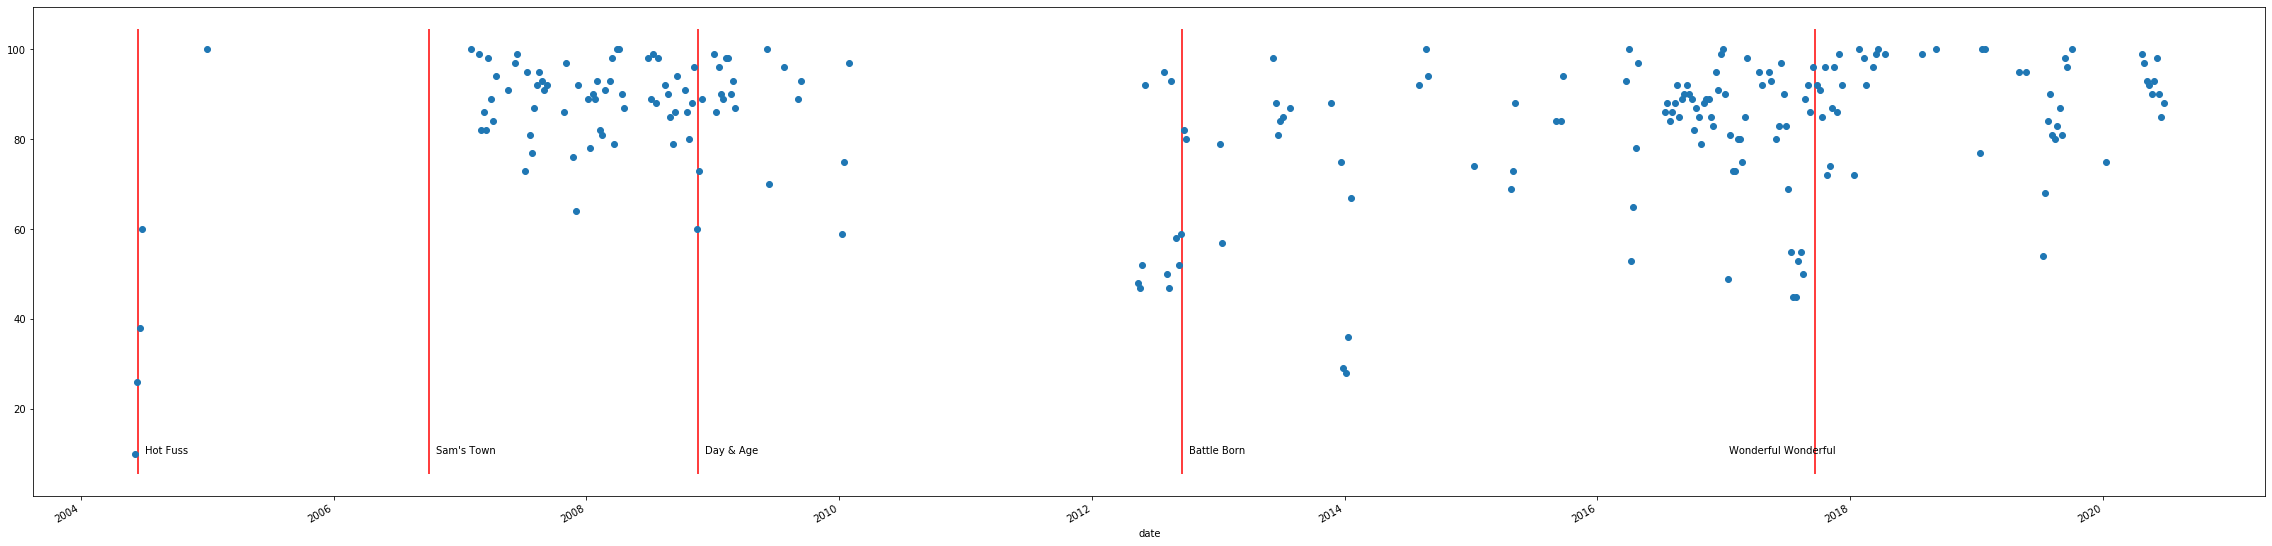

In [53]:
#Plot top 100 with release date of albums marked 

ax = df.plot(figsize=[40,10], style = 'o', legend = False)
ymin, ymax = plt.ylim()

for n, date in enumerate(album_df['date']):
    if n < len(album_df)-1:
        ax.vlines(x = date, ymin = ymin, ymax = ymax, color = 'r')
        ax.annotate(xy = [date + pd.Timedelta(20, unit = 'D'), 10], s = album_df['album'].iloc[n])
    else: 
        ax.vlines(x = date, ymin = ymin, ymax = ymax, color = 'r')
        ax.annotate(xy = [date + pd.Timedelta(-250, unit = 'D'), 10], s = album_df['album'].iloc[n])

In [66]:
th_rows = single_table.find_all('th', attrs = {'scope' : 'row'})
singles = [str(x.text.replace('\n','').replace(u'\xa1', '').replace('"', '')) for x in th_rows]

raw_release = single_table.find_all('li', text = re.compile('Year'))

th_rows
# single_release = [name.text.replace('<li>', '').replace('</li>', '').replace('Released:', '') for name in raw_release]

[<th scope="row">"<a href="/wiki/Mr._Brightside" title="Mr. Brightside">Mr. Brightside</a>"
 </th>,
 <th scope="row">"<a href="/wiki/Somebody_Told_Me" title="Somebody Told Me">Somebody Told Me</a>"
 </th>,
 <th scope="row">"<a href="/wiki/All_These_Things_That_I%27ve_Done" title="All These Things That I've Done">All These Things That I've Done</a>"
 </th>,
 <th scope="row">"<a href="/wiki/Smile_Like_You_Mean_It" title="Smile Like You Mean It">Smile Like You Mean It</a>"
 </th>,
 <th scope="row">"<a href="/wiki/When_You_Were_Young" title="When You Were Young">When You Were Young</a>"
 </th>,
 <th scope="row">"<a href="/wiki/Bones_(The_Killers_song)" title="Bones (The Killers song)">Bones</a>"
 </th>,
 <th scope="row">"<a href="/wiki/A_Great_Big_Sled" title="A Great Big Sled">A Great Big Sled</a>"<sup class="reference" id="cite_ref-nonalbum1_58-0"><a href="#cite_note-nonalbum1-58">[D]</a></sup><br/><span style="font-size:85%;">(featuring <a href="/wiki/Toni_Halliday" title="Toni Halliday